In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [7]:
# Load Dataset as csv file

air=pd.read_csv('EastWestAirlines_Assignment_7.csv')
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
print(type(air))
print(air.shape)

<class 'pandas.core.frame.DataFrame'>
(3999, 12)


In [10]:
air.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [11]:
air.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [12]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [13]:
#Count of duplicated rows
air[air.duplicated()].shape

(0, 12)

In [14]:
air[air.isnull().any(axis=1)].head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [15]:
air.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [18]:
# Drop colums
air_1 =  air.drop(['ID#','Award?'], axis=1)
air_1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


array([[<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'Qual_miles'}>,
        <AxesSubplot:title={'center':'cc1_miles'}>],
       [<AxesSubplot:title={'center':'cc2_miles'}>,
        <AxesSubplot:title={'center':'cc3_miles'}>,
        <AxesSubplot:title={'center':'Bonus_miles'}>],
       [<AxesSubplot:title={'center':'Bonus_trans'}>,
        <AxesSubplot:title={'center':'Flight_miles_12mo'}>,
        <AxesSubplot:title={'center':'Flight_trans_12'}>],
       [<AxesSubplot:title={'center':'Days_since_enroll'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

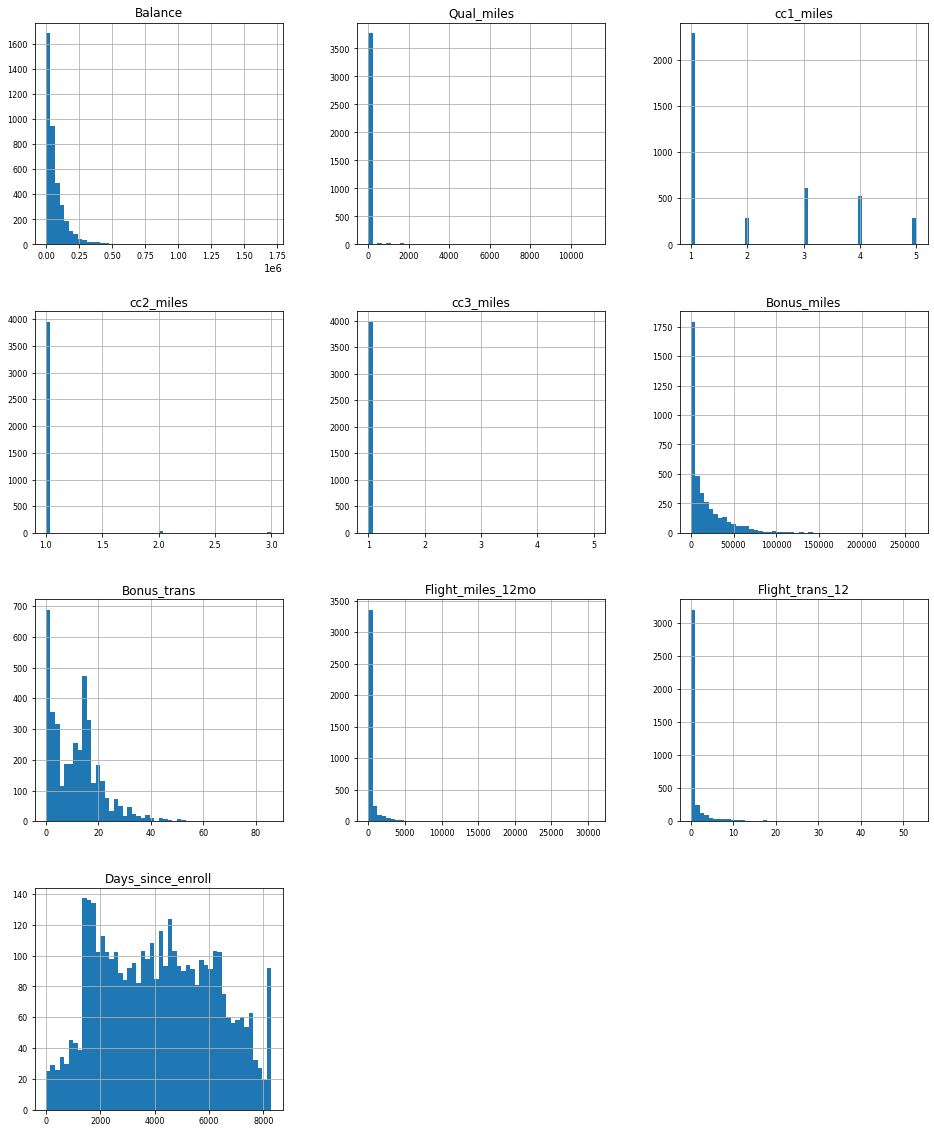

In [19]:
air_1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [28]:
corr=air_1.corr()

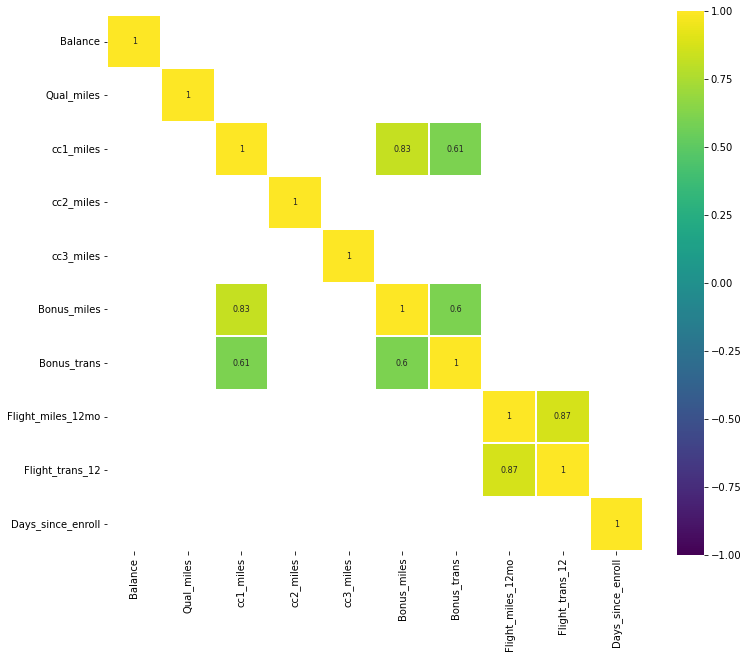

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


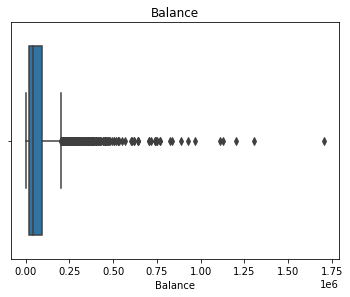

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


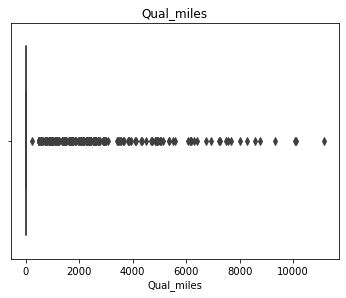

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


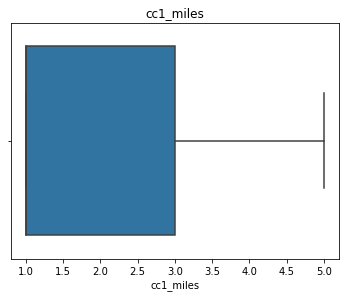

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


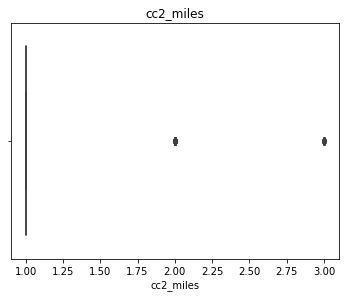

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


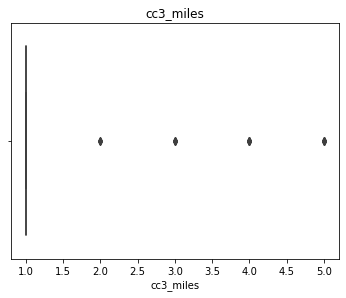

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


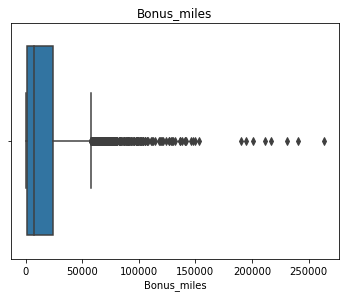

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


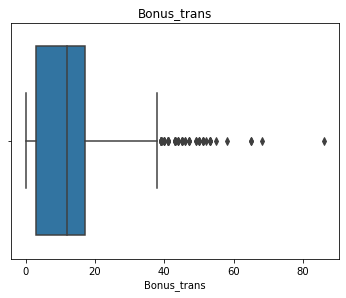

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


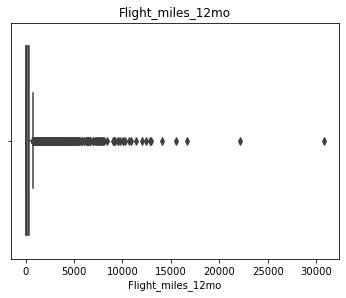

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


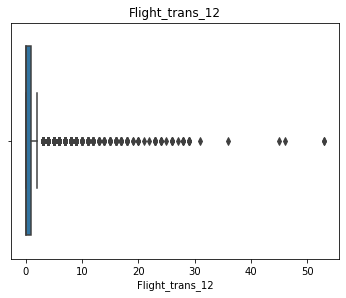

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


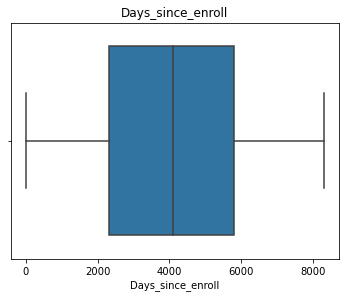

In [36]:
col_name= air_1[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']]

for i in col_name:
    n=1
    plt.figure(figsize=(20,20))
    plt.subplot(4,3,1)
    sns.boxplot(air_1[i])
    plt.title(i)
    plt.show()
    n=n+1
    

In [37]:
# Normalization  Function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_air_1_df = scaler.fit_transform(air_1.iloc[:,1:])

In [38]:
scaled_air_1_df

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.32860326,
        -0.36216787,  1.39545434],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.32860326,
        -0.36216787,  1.37995704],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.32860326,
        -0.36216787,  1.41192021],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.32860326,
        -0.36216787, -1.31560393],
       [-0.18629869, -0.76957841, -0.09824189, ...,  0.0285309 ,
        -0.09850333, -1.31608822],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.32860326,
        -0.36216787, -1.31754109]])

# KMeans

In [42]:
range(1,4)

range(1, 4)

In [43]:
for i in range(1,4):
    print(i)

1
2
3


In [41]:
kmeans = KMeans(n_clusters=4,random_state=0)
k_fit=kmeans.fit(scaled_air_1_df)
kmeans
wcss=[]
wcss.append(kmeans.inertia_)

In [44]:
k_fit=kmeans.fit(scaled_air_1_df)
k_fit

KMeans(n_clusters=4, random_state=0)

In [45]:
kmeans.n_clusters

4

In [46]:
kmeans.max_iter

300

In [50]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_air_1_df)
    wcss.append(kmeans.inertia_)
    if i > 2:
        break

In [51]:
wcss

[35991.000000000015, 28736.674262878798, 24169.90306156499]

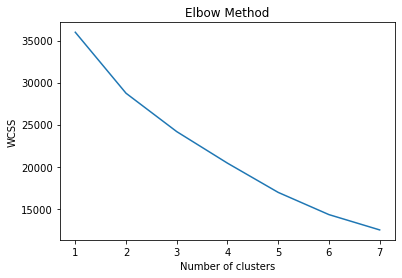

In [52]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_air_1_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
kmeans = KMeans(n_clusters = 4,random_state=42)
k_fit = kmeans.fit(air_1)

In [55]:
sets = k_fit.labels_

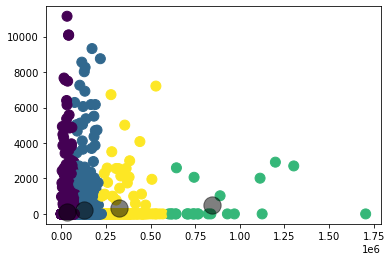

In [56]:
# Let's visualize the data we reduced to 4 sets.

plt.scatter(air_1.iloc[:,0], air_1.iloc[:,1], c = sets, s = 100, cmap = "viridis")

centers = k_fit.cluster_centers_                                
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 300, alpha = 0.5);

In [61]:
kmeans_3 = KMeans(n_clusters = 3,random_state=42)
k_fit_3 = kmeans_3.fit(air_1)
sets = k_fit_3.labels_
centers = kmeans_3.cluster_centers_


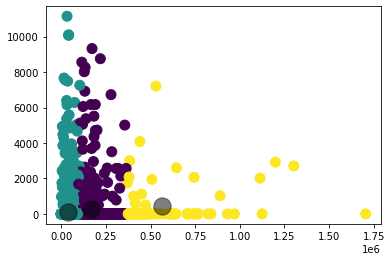

In [62]:
# Let's visualize the data we reduced to 3 sets.

plt.scatter(air_1.iloc[:,0], air_1.iloc[:,1], c = sets, s = 100, cmap = "viridis")

centers = k_fit_3.cluster_centers_                                
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 300, alpha = 0.5);

In [65]:
kmeans_2 = KMeans(n_clusters = 2,random_state=42)
k_fit_2 = kmeans_2.fit(air_1)
sets = k_fit_2.labels_
centers = kmeans_2.cluster_centers_

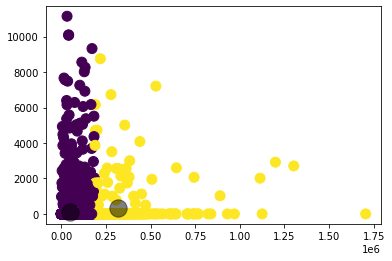

In [66]:
# Let's visualize the data we reduced to 3 sets.

plt.scatter(air_1.iloc[:,0], air_1.iloc[:,1], c = sets, s = 100, cmap = "viridis")

centers = k_fit_2.cluster_centers_                                
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 300, alpha = 0.5);

# Hierarchy


In [67]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [68]:
air=pd.read_csv('EastWestAirlines_Assignment_7.csv')
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [69]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [70]:
df_norm = norm_func(air.iloc[:,1:])

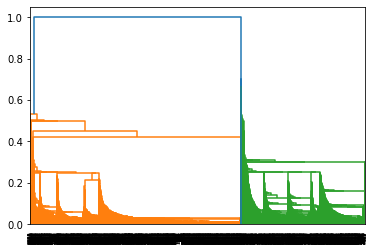

In [71]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [72]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [73]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=3)

In [74]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [75]:
Clusters.head()

,Clusters
0,1
1,1
2,1
3,1
4,0


# DBSCAN

In [76]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
air=pd.read_csv('EastWestAirlines_Assignment_7.csv')
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [79]:
air=air.iloc[:,1:]
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [80]:
array=air.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [81]:
stscaler = StandardScaler().fit(array)
x = stscaler.transform(array)

In [83]:
dbscan = DBSCAN(eps=4, min_samples=10,metric='euclidean')
model=dbscan.fit(x)
model

DBSCAN(eps=4, min_samples=10)

In [84]:
label=dbscan.labels_
label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [86]:
cl.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [87]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 3


In [89]:
clustered = pd.concat([air,cl],axis=1)

In [91]:
clustered[clustered['cluster']==-1].head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,-1
151,930410,0,5,1,1,211284,18,2250,6,7640,1,-1
220,1302051,2706,5,1,1,90653,32,3050,7,7467,1,-1
275,1704838,0,1,1,1,17108,32,4823,23,7283,1,-1


In [92]:
a=0
while a<5:
  print(a)
  a=a+1

0
1
2
3
4


In [93]:
clustered.mean()

Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
cluster                  0.005751
dtype: float64

# THE END